# Кастеризация методом k-means

**Данные:** Экономика городов

**Задание:** 
- Определить число кластеров **методом k-means** и обосновать свой выбор
- Разбить объекты на кластеры
- Предложить и обосновать интерпертацию кластеров

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", decimal=',', index_col='City')
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [5]:
# постмотрю всю таблицу с данными

print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

В городах Cairo и Jakarta значения среднего числа рабочих часов и средняя зарплата за час работы равны -9999. Возможно, в данных какая-то ошибка. Они помешают для дальнейшего анализа, поэтому удалю данные строки.

In [6]:
df = df.drop(['Cairo','Jakarta'],axis = 0)
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9
Copenhagen,1717,91.3,62.9


In [7]:
# Стандартизуем переменные
from sklearn import preprocessing

stand = preprocessing.StandardScaler()
#stand = preprocessing.MinMaxScaler()
#stand = preprocessing.MaxAbsScaler()
stand.fit(df)
X = stand.transform(df)

X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [8]:
X.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


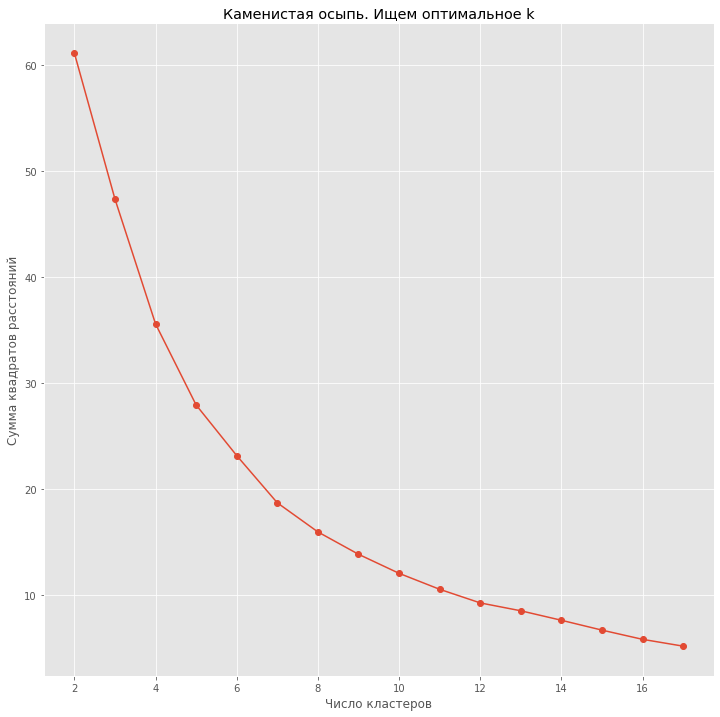

In [9]:
#  Определяем число кластеров
K = range(2, 18)
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
fig = plt.figure(figsize=(12,12))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Крайний заметный излом графика происходит там, где число кластеров равно 7. Допустим, что 7 кластеров - это оптимальный выбор.
Перейдем к интерпретации кластеров, посмотрим, чем они отличаются друг от друга. Для этого применим метод labels_, а затем посчитаем средние значения переменных для каждого кластера.

In [10]:
model = KMeans(n_clusters=7, random_state=42)
model.fit(X)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1733.750000,113.850000,59.375000
1,1999.250000,55.487500,14.475000
2,1732.000000,78.135714,53.614286
3,1990.833333,77.233333,55.316667
4,2202.800000,43.100000,11.700000
5,1874.000000,97.950000,95.150000
6,1798.857143,50.942857,19.214286


In [11]:
#  Подсчитаем объемы кластеров
df.groupby('cluster').size()

cluster
0     4
1     8
2    14
3     6
4     5
5     2
6     7
dtype: int64

In [12]:
df['cluster'].sort_values()

City
Tokyo             0
Stockholm         0
Oslo              0
Helsinki          0
Panama            1
Tel_Aviv          1
Buenos_Aires      1
Caracas           1
Singpore          1
Johannesburg      1
Mexico_City       1
Nairobi           1
Madrid            2
Milan             2
Amsterdam         2
Vienna            2
Paris             2
Sydney            2
Montreal          2
London            2
Luxembourg        2
Copenhagen        2
Brussels          2
Dublin            2
Dusseldorf        2
Frankfurt         2
Toronto           3
Taipei            3
Chicago           3
Los_Angeles       3
Houston           3
New_York          3
Hong_Kong         4
Manila            4
Bombay            4
Kuala_Lumpur      4
Bogota            4
Geneva            5
Zurich            5
Nicosia           6
Lisbon            6
Rio_de_Janeiro    6
San_Paulo         6
Seoul             6
Athens            6
Lagos             6
Name: cluster, dtype: int32

### Интерпретация
**1 кластер:** В него вошли города Скандинавии и японский Токио. Это столицы стран, находящихся на побережье океанов. В этих городах саме высокие цены, в среднем там не так много работают, но имеют средние зарплаты.

**2 кластер:** Сюда вошли города из Южной Америки, Африки, Азии. Их объединяет жаркий климат и густонаселенность. Среднние цены на товары здесь превышают среднюю зарплату почти в 4 раза.

**3 кластер:** Сюда вошли евпропейские города, канадский Монреаль и австралийсикй Сидней. Их объединяет сильная экономика, поэтому они в среднем меньше всех работают, имеют высокие цены на товары и высокие зарплаты.

**4 кластер:** Крупные административные центры Америки, Канады и Китая объединены даннным кластером. Как и в предыдущем кластере имеют средние цены и зарплаты, но люди здесь больше работают.

**5 кластер:** Здесь объединились крупные азиатские города и столица Колумбии. Эти города очень похожи по уровню жизни, по демографии и климату. Эти города очень густо населены и это заставляет людей там много работать, но средние зарплаты и цены там самые низкие.

**6 кластер:** Сюда вошли два города маленькой, но богатой страны Европы - Швейцарии. Их особенность в том, что средние цены и средние зарплаты высокие и практически равны между собой, что позволяет гражданам меньше работать.

**7 кластрер:** Объединил города разных континентов, которые отличаются жарким климатом, поэтому люди здесь меньше времени работают, имеют средние цены и сравнительно невысокие заработные платы.